<img src="header.png" align="left"/>

# Anwendungsbeispiel Analysis and quality control of data 

Die Ziel dieses Beispieles ist es die Methoden der Datenanalyse nochmals zu zeigen und deren Notwendigkeit zu begründen.


- Datentypen und Form der Daten
- Visualisierung
- Fehlende Daten
- Statistische Werte
- Outliers und Anomalien in den Daten
- Korrelationen und Beziehungen zwischen den Features
- Fehler in den Trainingsdaten
- Stabilere Prüfung der Modellqualität


Code und Informationen entnommen von:

- [https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- [https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb](https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb)

# Import der Module

In [87]:
#
# Import der Module
#
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip

from scipy import stats
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN


In [9]:
#
# Abdrehen von Fehlermeldungen
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 9]

# Datentypen und Form der Daten

In [15]:
# 
# Laden der Daten
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv('data/iris/iris_mutilated.csv', names=names)

In [16]:
#
# Anzeige der Form der Daten
#
print(iris.shape)

(153, 5)


In [17]:
#
# Anzeige der Datentypen
#
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  153 non-null    float64
 1   sepal-width   153 non-null    float64
 2   petal-length  153 non-null    float64
 3   petal-width   151 non-null    float64
 4   class         153 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB
None


# Visualisierung

In [18]:
#
# Anzeige von Samples zur Visualisierung der Inhalte
#
print(iris.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [54]:
print(iris.tail())

     sepal-length  sepal-width  petal-length  petal-width           class
148           6.7          3.0           5.2          2.3  Iris-virginica
149           6.3          2.5           5.0          1.9  Iris-virginica
150           6.5          3.0           5.2          2.0  Iris-virginica
151           6.2          3.4           5.4          2.3  Iris-virginica
152           5.9          3.0           5.1          1.8  Iris-virginica


# Fehlende Daten

In [26]:
#
# Liste alle Reihen mit fehlenden Werten
# any(axis=1) liefert ein True, wenn eines der Features über die axis 1 True ist
# 
iris[iris.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class
108,7.6,3.0,6.6,NaN,Iris-virginica
109,4.9,2.5,4.5,NaN,Iris-virginica


In [28]:
#
# Ersetzen durch Mittelwert des Features (grauslich)
#
iris_non = iris.fillna(iris.mean())

In [29]:
iris_non[iris_non.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


Füllen von fehlenden Werte mit dem Mittelwert des Features erzeugt neue Datenpunkte, die potentiell störend sind. Alternativ können die Datenpunkte gelöscht werden.

# Duplikate

In [30]:
#
# Prüfung auf Duplikate zeigt zwar doppelte Werte, aber keine massiven Störungen
# bis auf Weiteres keine Änderung 
#
iris_non[iris_non.duplicated()]

,sepal-length,sepal-width,petal-length,petal-width,class
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.7,3.2,1.6,0.2,Iris-setosa
32,4.7,3.2,1.6,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
40,4.9,3.1,1.5,0.1,Iris-setosa
145,5.8,2.7,5.1,1.9,Iris-virginica


# Einfache Statistiken

In [31]:
#
# Verteilung der Labels (Klassen)
#
print(iris_non.groupby('class').size())

class
Iris-setosa        53
Iris-versicolor    50
Iris-virginica     50
dtype: int64


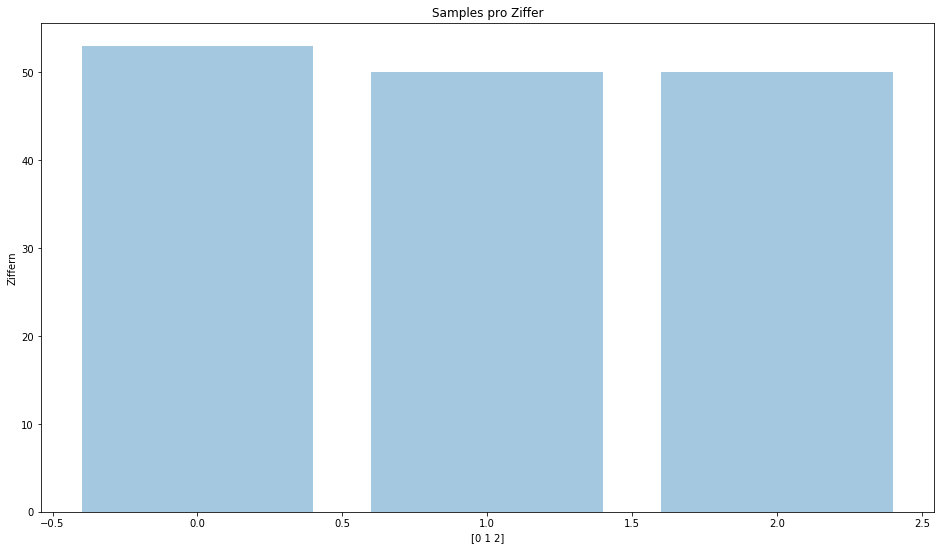

In [36]:
#
# Histogramm der Klassen als Plot 
#
#
# Prüfen der Verteilung der Klassen
#
df = pd.DataFrame(iris_non,columns=['class'])
counts= df.groupby('class').size()
class_pos = np.arange(3)
plt.bar(class_pos, counts, align='center', alpha=0.4)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()

In [37]:
#
# Analyse der Verteilung der Werte in den Features als Tabelle
#
iris_non.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,153.000000,153.000000,153.000000,153.000000
mean,5.820915,3.056863,3.716340,1.169536
std,0.835137,0.429774,1.772541,0.763389
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Outliers und Anomalien in den Daten

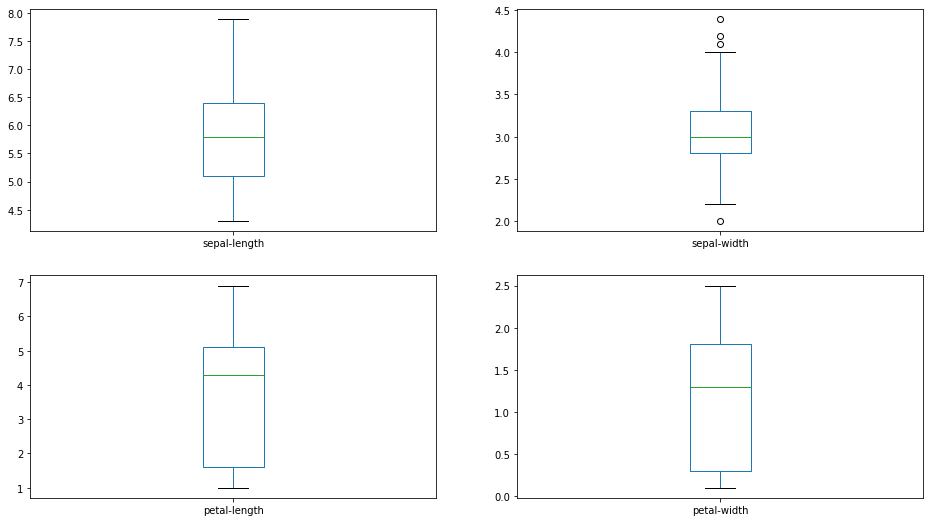

In [53]:
#
# Analyse der Verteilung der Werte in den Features als Boxplot (outliers)
#
iris_non.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [ ]:
#
# Mathematische Berechnung
#

In [77]:
values = iris_non.values[:,:-1].astype(np.float64)

In [78]:
z = np.abs(stats.zscore(values))
print(z)

[[8.66064201e-01 1.03447934e+00 1.31108203e+00 1.27421388e+00]
 [1.10633224e+00 1.32742924e-01 1.31108203e+00 1.27421388e+00]
 [1.34660028e+00 3.34145981e-01 1.36768348e+00 1.27421388e+00]
 [1.46673430e+00 1.00701529e-01 1.25448058e+00 1.27421388e+00]
 [9.86198220e-01 1.26792379e+00 1.31108203e+00 1.27421388e+00]
 [5.05662145e-01 1.96825715e+00 1.14127767e+00 1.01136375e+00]
 [1.46673430e+00 8.01034886e-01 1.31108203e+00 1.14278881e+00]
 [9.86198220e-01 8.01034886e-01 1.25448058e+00 1.27421388e+00]
 [1.70700233e+00 3.66187377e-01 1.31108203e+00 1.27421388e+00]
 [1.10633224e+00 1.00701529e-01 1.25448058e+00 1.40563895e+00]
 [5.05662145e-01 1.50136824e+00 1.25448058e+00 1.27421388e+00]
 [1.22646626e+00 8.01034886e-01 1.19787912e+00 1.27421388e+00]
 [1.22646626e+00 1.32742924e-01 1.31108203e+00 1.40563895e+00]
 [1.82713635e+00 1.32742924e-01 1.48088639e+00 1.40563895e+00]
 [2.51260693e-02 2.20170160e+00 1.42428494e+00 1.27421388e+00]
 [1.45260088e-01 3.13547941e+00 1.25448058e+00 1.011363

In [79]:
#
# Filtern aller Werte mit z-score >= 3
#
iris_non_noo = iris_non[(z < 3).all(axis=1)]

In [80]:
iris_non_noo.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,152.000000,152.000000,152.000000,152.000000
mean,5.821711,3.048026,3.730921,1.174599
std,0.837840,0.417017,1.769171,0.763331
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


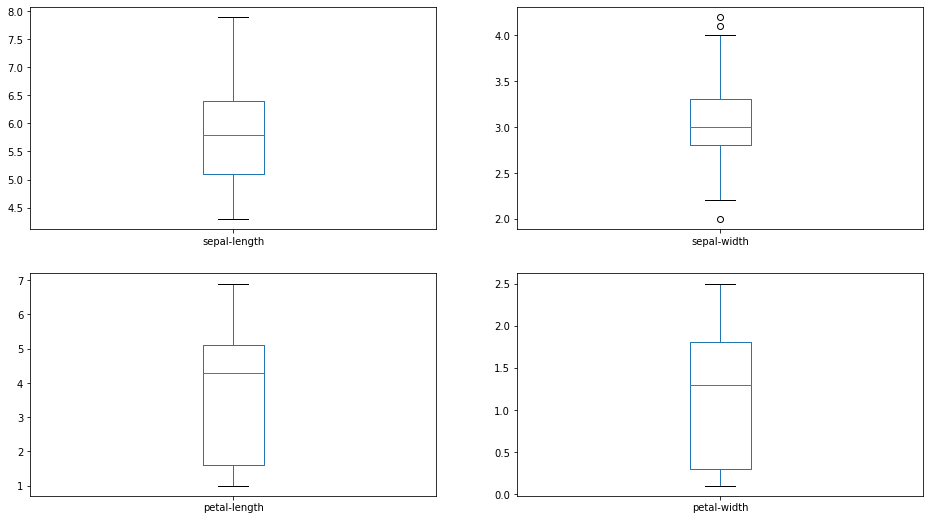

In [86]:
#
# Analyse der Verteilung der Werte in den Features als Boxplot (outliers)
#
iris_non_noo.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [83]:
#
# Durch Clustering (Teil des KI Profi Kurses)
#
outlier_detection = DBSCAN( min_samples = 2, eps = 0.6 )
clusters = outlier_detection.fit_predict( iris_non.values[:,:-1] )
list(clusters).count(-1)

4

In [84]:
print(clusters)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  1  1  1  1  2  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1
  3  4  1  1  1  4  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


# Korrelationen und Beziehungen zwischen den Features

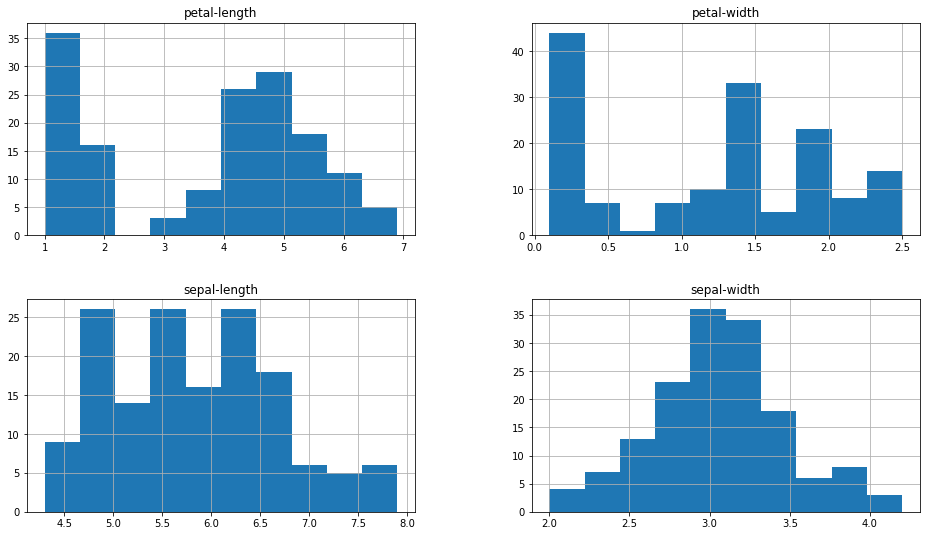

In [85]:
#
# Analyse der Verteilung der Werte in den Features als Histogram
#
iris_non_noo.hist()
plt.show()

In [44]:
#
# Mathematische Analyse der Beziehungen zwischen den Features (Korrelation)
#
iris_non.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.116247,0.875692,0.817397
sepal-width,-0.116247,1.000000,-0.421980,-0.354123
petal-length,0.875692,-0.421980,1.000000,0.954912
petal-width,0.817397,-0.354123,0.954912,1.000000


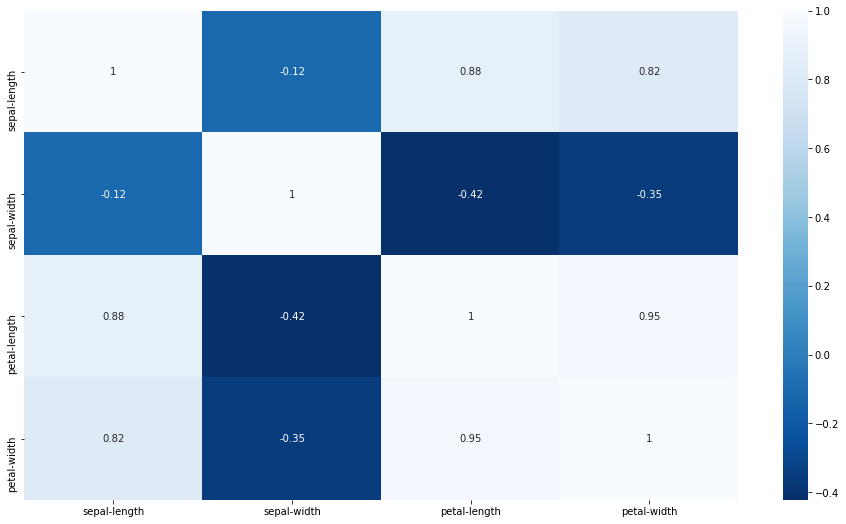

In [52]:
sns.heatmap(iris_non.corr(),annot=True,cmap='Blues_r')

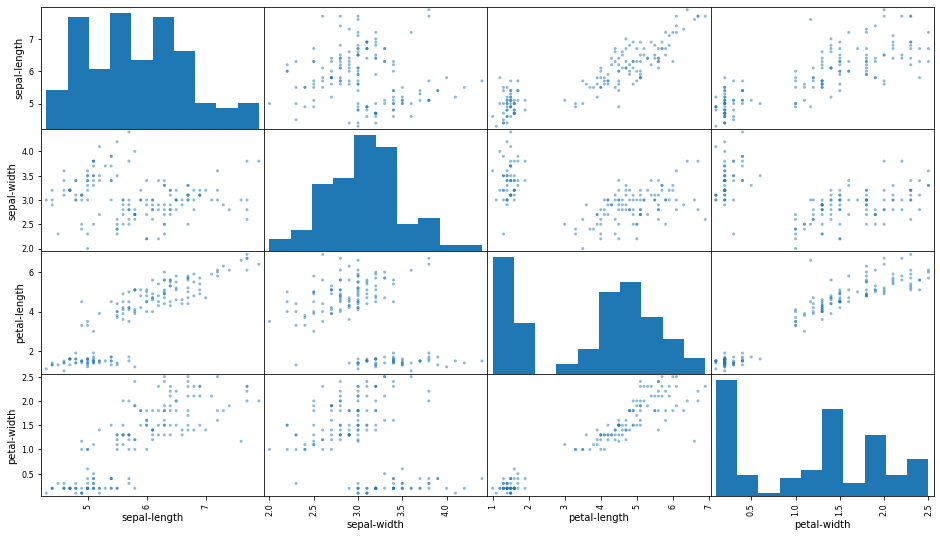

In [40]:
#
# Darstellung der Beziehungen zwischen den Features als Matrix Plot
#
scatter_matrix(iris_non)
plt.show()

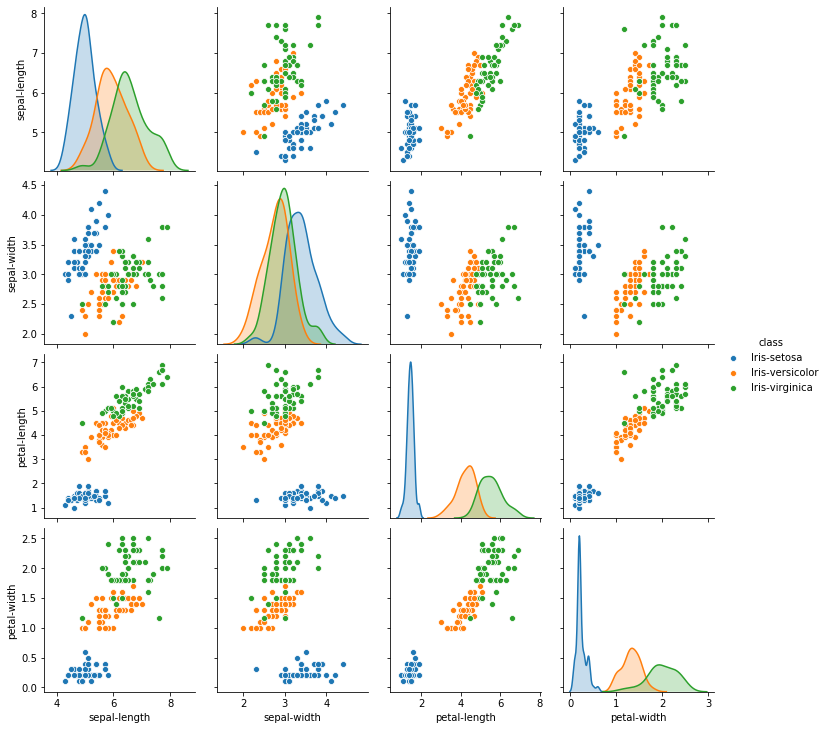

In [41]:
#
# Darstellung der Beziehungen zwischen den Features als Matrix Plot mit Unterscheidung der Klassen
# Eine wichtige Fragestellung ist dabei die Separierbarkeit
#
sns.pairplot(iris_non,hue='class')

In [ ]:
#
# Neue Form der Darstellung der Zusammenhänge zwischen Features und Klassen
#

In [88]:
iris_data = iris_non.to_dict('records')
iris_data[:2]

[{'sepal-length': 5.1,
  'sepal-width': 3.5,
  'petal-length': 1.4,
  'petal-width': 0.2,
  'class': 'Iris-setosa'},
 {'sepal-length': 4.9,
  'sepal-width': 3.0,
  'petal-length': 1.4,
  'petal-width': 0.2,
  'class': 'Iris-setosa'}]

In [ ]:
hip.Experiment.from_iterable(iris_data).display(force_full_width=True)

# Fehler in den Trainingsdaten


# Stabilere Prüfung der Modellqualität